In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
class ScratchLogisticRegression():
    
    def __init__(self, num_iter=100, lr=0.01, C=1,
                 random_state=None,bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _linear_combination(self,X):
       
        x1 = X
        
        # x0 (バイアス項) の作成
        if self.bias == True:
            x0 = np.ones(x1.shape[0])
        else:
            x0 = np.zeros(x1.shape[0])
        
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
        
        
    def _hypothetical_function(self,X):
        
        x = X
        z = np.dot(x,self.theta)
        
        return 1/(1+np.exp(-z))
    
    def _gradient_descent(self, X, error):
       
        # tmpでi=1,2,...に正則化(lamda)を追加する。
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)
        
        #self.theta -= self.lr*np.dot(error,X)/len(X)
        #self.theta[1:] -= self.lr*self.lamda*self.theta[1:]/len(X)
        
    def _loss_function(self, y, yhat):
        
        return np.mean(-y*np.log(yhat) -(1-y)*np.log(1-yhat))+0.5*self.lamda*np.mean(self.theta[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        
        # y のラベル値を取得する
        self.ylabel = np.unique(y)
        
        # y のラベル値を 0,1 に置き換える
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        # 線形結合
        X = self._linear_combination(X)
        
        # パラメータ θ の初期値を乱数で与える
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            # 予測される確率
            yhat = self._hypothetical_function(X)
            
            # 測定誤差
            error = yhat - y            
            self.loss[i] = self._loss_function(y,yhat)
            
            if (type(X_val) != bool):
                val_X = self._linear_combination(X_val)
                val_yhat = self._hypothetical_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_yhat)
            
            self._gradient_descent(X, error)
            
            # verboseをTrueにした際は学習過程を出力
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
            
        # θを保存
        np.save('theta', self.theta)
        
            

    def predict(self, X):
        
        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)
        
        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        
        X = self._linear_combination(X)
        
        return self._hypothetical_function(X)

In [3]:
# 問題1:仮定関数

x1 = np.arange(1,11,1).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)
print('x:\n',x)


x:
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [4]:
# パラーメータ　θ
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [ 0.11353824 -0.24352069]


In [5]:
# 線形結合
z = np.dot(x,theta)
print('z:\n',z)

z:
 [-0.12998245 -0.37350314 -0.61702383 -0.86054452 -1.10406521 -1.3475859
 -1.59110659 -1.83462728 -2.07814797 -2.32166866]


In [6]:
# シグモイド関数にzを代入する・・・0<y<1を出力する
y = 1/(1+np.exp(-z))
print('y:\n',y)

y:
 [0.46755006 0.40769481 0.35045864 0.29722559 0.24897897 0.20626533
 0.16922826 0.13768795 0.11123894 0.0893442 ]


In [7]:
# 実行する
z1 = np.arange(-50,50,0.1)
y1 = 1/(1+np.exp(-z1))

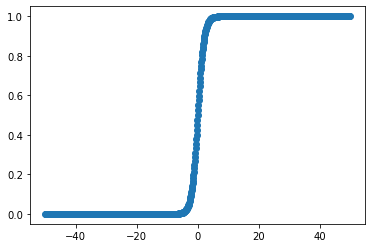

In [8]:
plt.scatter(z1,y1)
plt.plot();

In [9]:
# 問題2:最急降下法

# パラメータ更新の実装前チェック 予測値ラベル変換
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

y = np.array([0.4,0.5,0.2,0.1,0.9])
yhat = np.where(y<0.5,0,1)
y_test = np.array([1,1,0,0,1])
print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)

x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [10]:
# パラメータ　θ
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [-1.40626312  1.66788388]


In [11]:
# yhat,y のエラー
error = yhat - y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [12]:
# ラムダ
lm = np.array([0,1])
theta*lm

array([-0.        ,  1.66788388])

In [13]:
# パラメータの更新
0.01*np.dot(error,x)/len(x) + theta*lm/len(x)

array([-0.002     ,  0.32957678])

In [14]:
theta -=  (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [-1.40426312  1.3383071 ]


In [15]:
theta -=  (0.01*np.mean(np.dot(error,x)) + theta*lm/len(x))
theta

array([-1.38926312,  1.08564568])

In [16]:
# 問題3:推定

x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x2 = np.array([2,1,5,2,4]).reshape(-1,1)
y = np.array([1,0,0,0,1])
print('x1:\n',x1)
print('x1:\n',x2)
print('y:\n',y)

x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x1:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 0 0 0 1]


In [17]:
clf = ScratchLogisticRegression()
clf.fit(x1,y,x1,y)

y_proba = clf.predict_proba(x2)
y_pred = clf.predict(x2)

In [18]:
print('y_proba:\n',y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.43226146 0.46597388 0.33590967 0.43226146 0.36696466]
y_pred:
 [0 0 0 0 0]


In [19]:
# 問題4:目的関数

# データ作成の確認
y1 = np.ones(99)
y2 = np.zeros(99)
yh = np.arange(0.01,1.0,0.01)

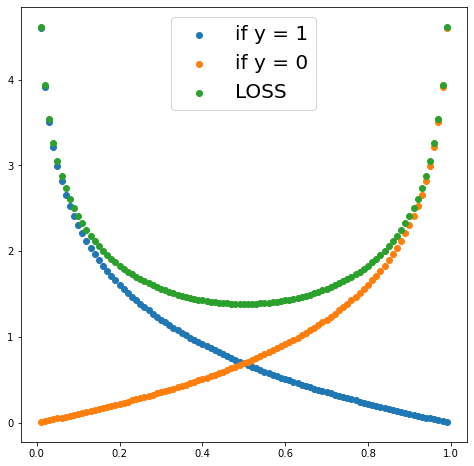

In [20]:
# チェックデータで目的関数Jをイメージしてみる
J1 = -y1*np.log(yh)-(1-y1)*np.log(1-yh)
J2 = -y2*np.log(yh)-(1-y2)*np.log(1-yh)
J = -y1*np.log(yh)-(1-y2)*np.log(1-yh)

# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(8,8))

plt.rcParams["font.size"] = 20
plt.scatter(yh,J1,label='if y = 1')
plt.scatter(yh,J2,label='if y = 0')
plt.scatter(yh,J,label='LOSS')
plt.legend();

In [21]:
# 問題5:学習と推定

from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)

In [22]:
import pandas as pd

iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

In [23]:
disp = False
if disp == True:
    sns.pairplot(iris,palette='tab10');

In [24]:
iris_X = iris.loc[iris[4]!=0,2:3].values
iris_y = iris.loc[iris[4]!=0,4].values
print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)

iris_X.shape: (100, 2)
iris_y.shape: (100,)


In [25]:
# アイリス データセットのトレーニングと推定
from sklearn.model_selection import train_test_split
X = iris_X
y = iris_y

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (80, 2)
y_train.shape: (80,)
X_valid.shape: (20, 2)
y_valid.shape: (20,)


In [26]:
# yの一意な値
np.unique(y)

array([1., 2.])

In [27]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [28]:
clf = ScratchLogisticRegression(num_iter=500, lr=0.01, C=0.01 ,verbose=False)
clf.fit(X_train_std,y_train,X_valid_std,y_valid)

y_pred = clf.predict(X_valid_std)
y_prob = clf.predict_proba(X_valid_std)

In [29]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1.])

In [30]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [31]:
y_prob

array([0.45735558, 0.65162617, 0.47861229, 0.67670163, 0.59806673,
       0.65796294, 0.45040668, 0.52136163, 0.63849535, 0.61200225,
       0.57052455, 0.54964705, 0.61184952, 0.45032708, 0.30481543,
       0.34849611, 0.47861229, 0.40858747, 0.50703531, 0.42929226])

In [32]:
# 評価指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
precision 1.0
recall 0.9
f1 0.9473684210526316


In [33]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()

clf2.fit(X_train_std,y_train)

y_pred2 = clf2.predict(X_valid_std)
y_prob2 = clf2.predict_proba(X_valid_std)

In [34]:
y_pred2

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [35]:
y_prob2

array([[0.76737906, 0.23262094],
       [0.00433067, 0.99566933],
       [0.61748578, 0.38251422],
       [0.00129925, 0.99870075],
       [0.02349218, 0.97650782],
       [0.00315976, 0.99684024],
       [0.81905709, 0.18094291],
       [0.29073037, 0.70926963],
       [0.00643586, 0.99356414],
       [0.01889651, 0.98110349],
       [0.063196  , 0.936804  ],
       [0.13420375, 0.86579625],
       [0.01684086, 0.98315914],
       [0.81020475, 0.18979525],
       [0.99898085, 0.00101915],
       [0.99418802, 0.00581198],
       [0.61748578, 0.38251422],
       [0.94975691, 0.05024309],
       [0.37905511, 0.62094489],
       [0.89715647, 0.10284353]])

In [36]:
accuracy = accuracy_score(y_valid, y_pred2)
precision = precision_score(y_valid, y_pred2)
recall = recall_score(y_valid, y_pred2)
f1 = f1_score(y_valid, y_pred2)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
precision 1.0
recall 0.9
f1 0.9473684210526316


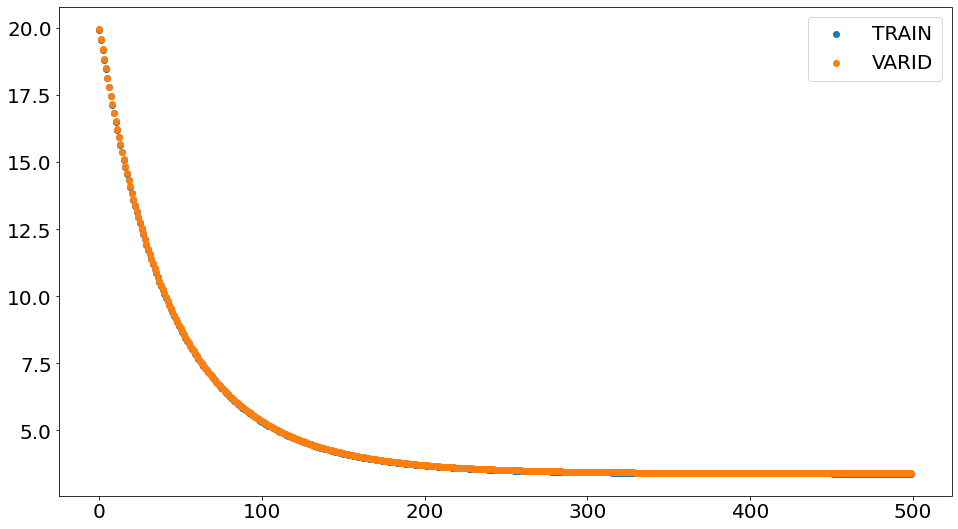

In [37]:
# 問題6:学習曲線のプロット

# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(clf.loss)),clf.loss,label='TRAIN')
plt.scatter(range(len(clf.val_loss)),clf.val_loss,label='VARID')
plt.legend();

In [38]:
# 問題7:決定領域の可視化

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # セッティング
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # 予測
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # プロット
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

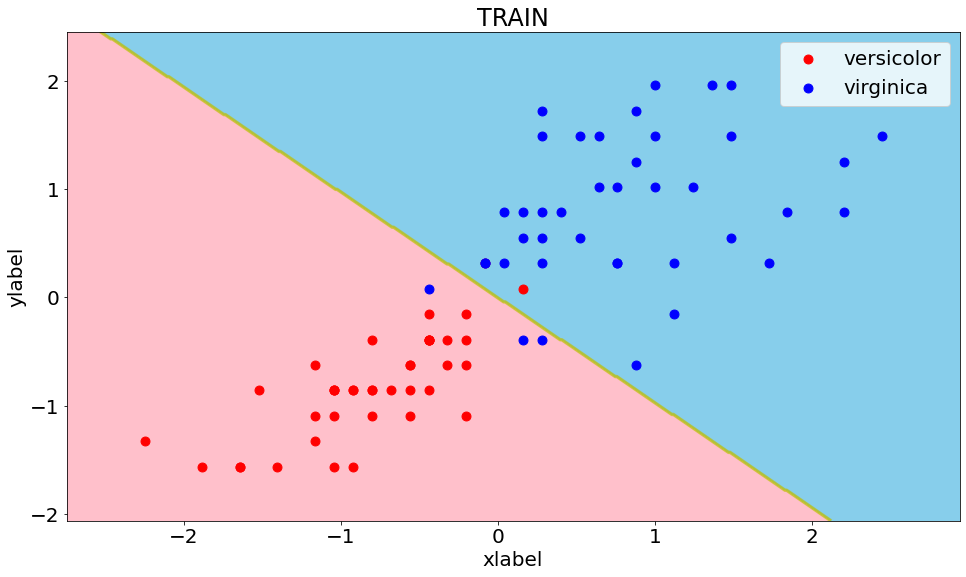

In [39]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='TRAIN');

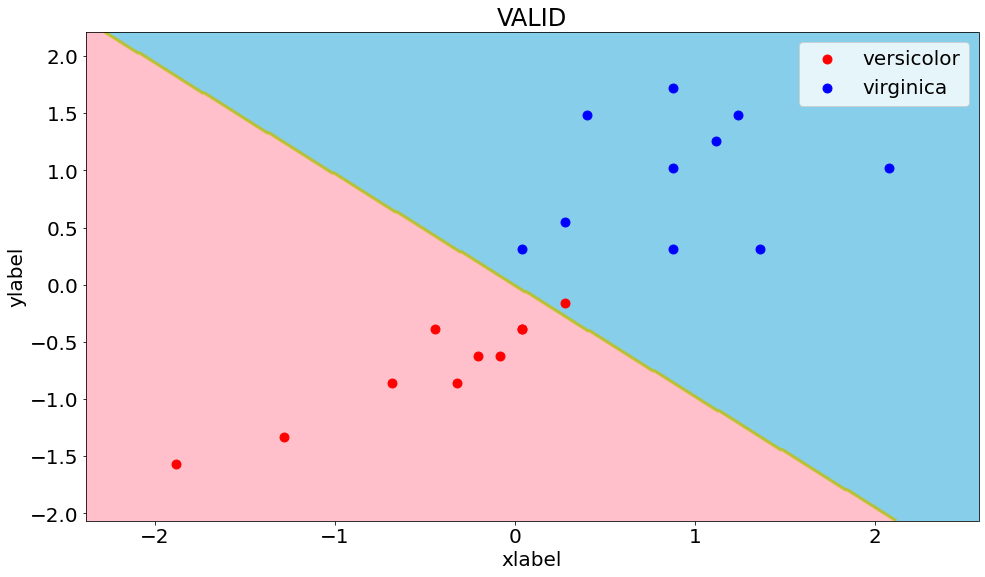

In [40]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='VALID')

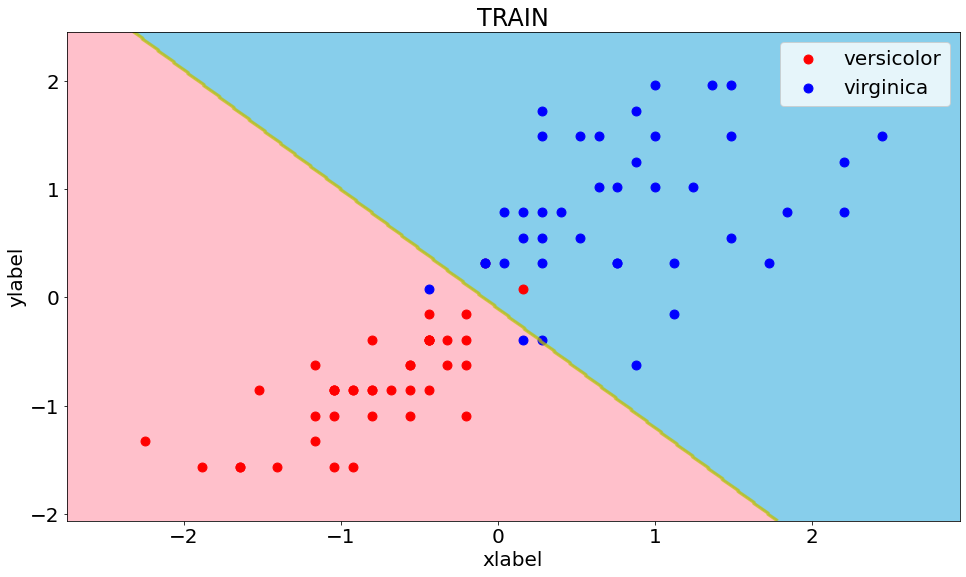

In [41]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf2,title='TRAIN')

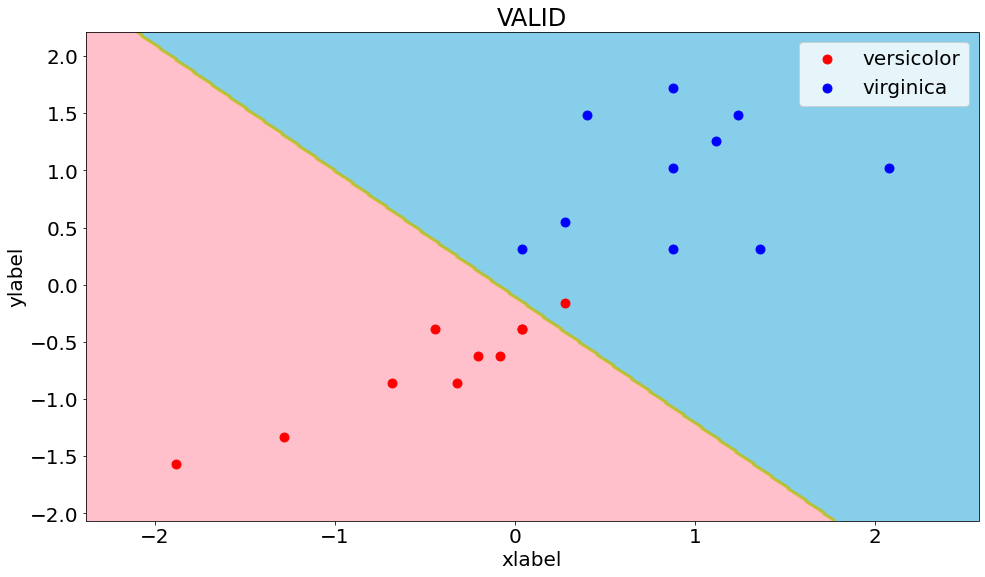

In [42]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf2,title='VALID')

In [43]:
# 問題8:(アドバンス課題)重みの保存

# 学習したthetaを'theta.npy'に保存する(関数内)
# 学習したthetaを呼び出す
np.load('theta.npy')

array([0.57920458, 0.23600323, 0.24280358])

Parameter: 0.001
KFold 1 / 4
SUCORE :  1.0
theta: [0.01121394 0.03084232 0.03030721]


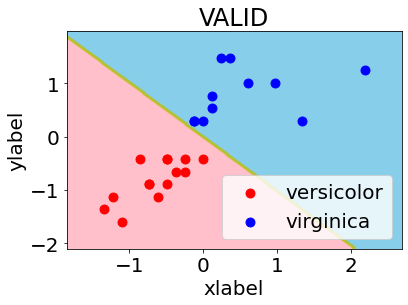

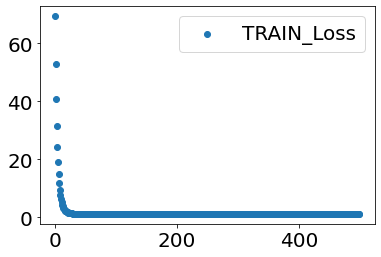

Parameter: 0.001
KFold 2 / 4
SUCORE :  0.92
theta: [0.01329798 0.02915252 0.03031262]


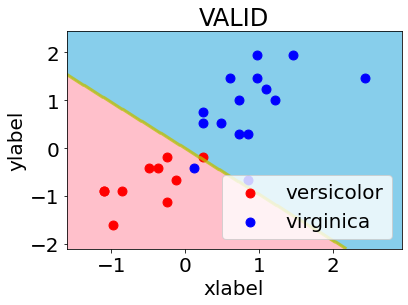

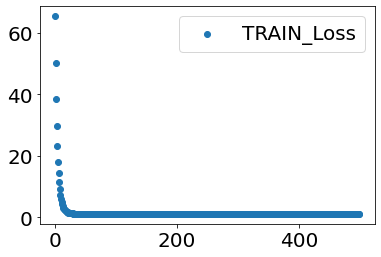

Parameter: 0.001
KFold 3 / 4
SUCORE :  0.96
theta: [0.05539321 0.02732566 0.02853051]


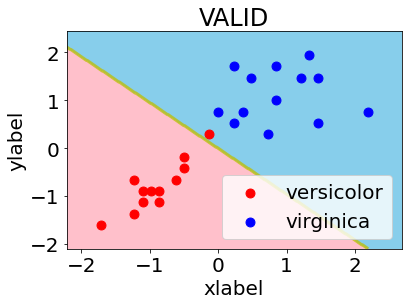

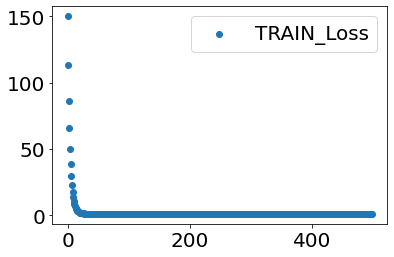

Parameter: 0.001
KFold 4 / 4
SUCORE :  0.88
theta: [0.1905711  0.02664003 0.03104862]


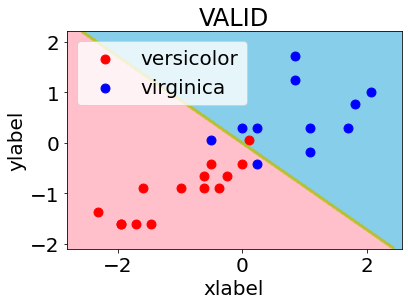

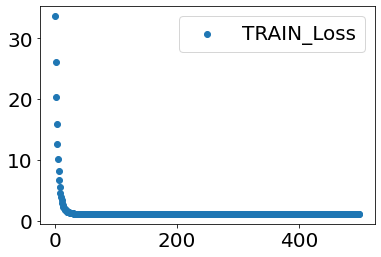

Parameter: 0.01
KFold 1 / 4
SUCORE :  0.96
theta: [0.56408629 0.21584238 0.23834659]


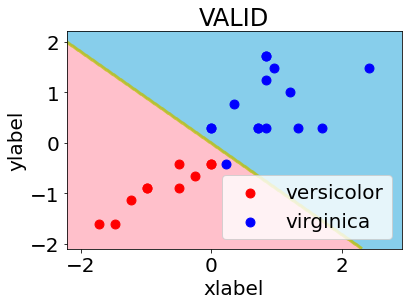

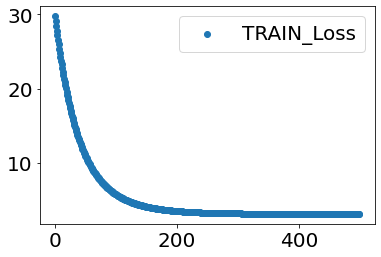

Parameter: 0.01
KFold 2 / 4
SUCORE :  0.88
theta: [0.68594127 0.233951   0.23494624]


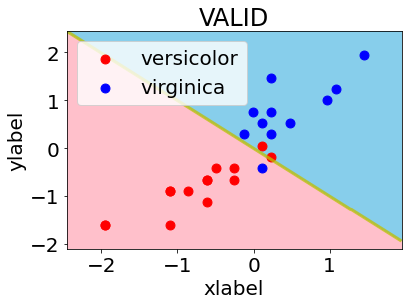

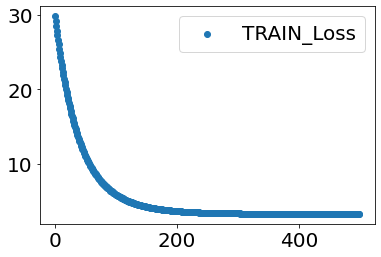

Parameter: 0.01
KFold 3 / 4
SUCORE :  1.0
theta: [0.55390362 0.20970776 0.22549658]


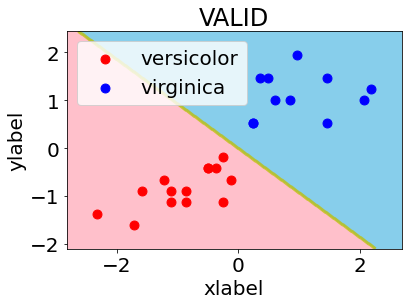

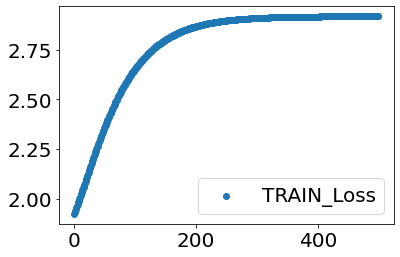

Parameter: 0.01
KFold 4 / 4
SUCORE :  0.92
theta: [0.1614517  0.21985088 0.2403446 ]


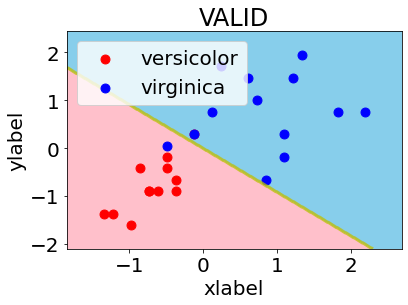

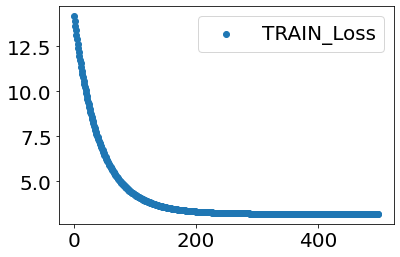

Parameter: 0.1
KFold 1 / 4
SUCORE :  0.88
theta: [0.70337265 0.66931223 0.96016691]


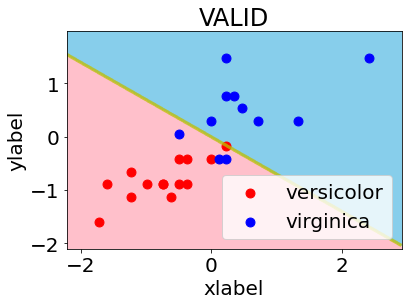

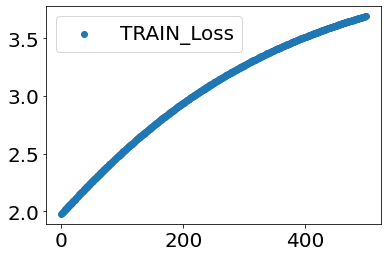

Parameter: 0.1
KFold 2 / 4
SUCORE :  1.0
theta: [0.75164817 0.7983509  0.76552139]


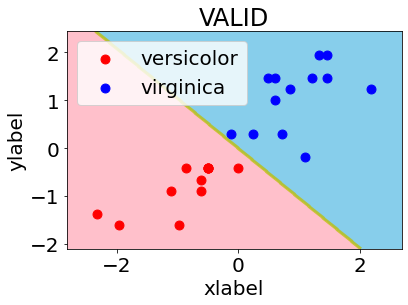

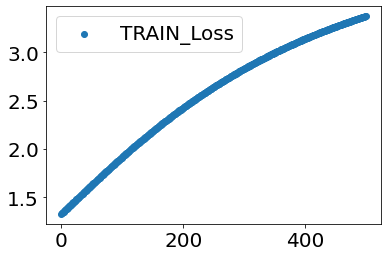

Parameter: 0.1
KFold 3 / 4
SUCORE :  0.92
theta: [0.27826598 0.7596236  0.75720197]


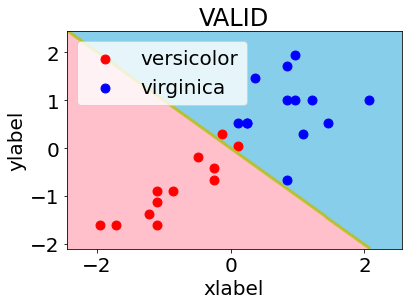

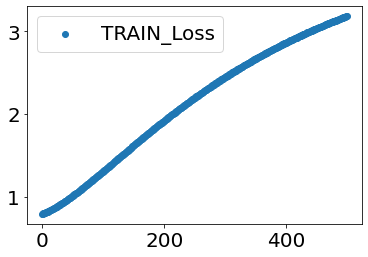

Parameter: 0.1
KFold 4 / 4
SUCORE :  1.0
theta: [0.37047896 0.68943642 0.78907292]


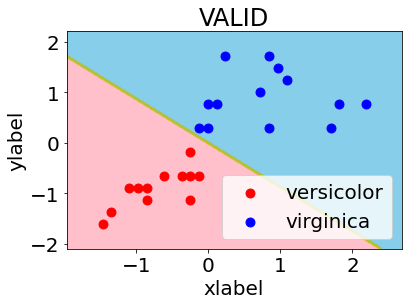

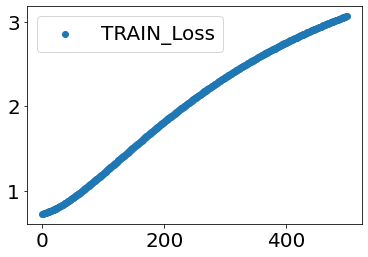

Parameter: 1
KFold 1 / 4
SUCORE :  0.88
theta: [0.53858772 0.83417207 1.1356884 ]


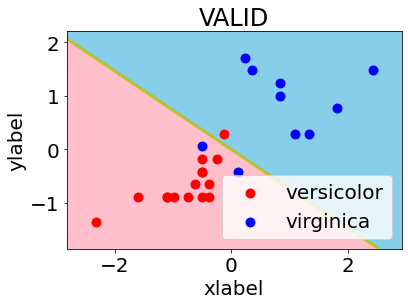

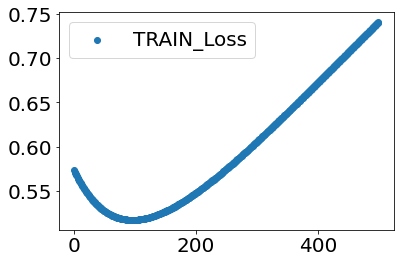

Parameter: 1
KFold 2 / 4
SUCORE :  0.96
theta: [0.98585654 1.32032066 0.82091756]


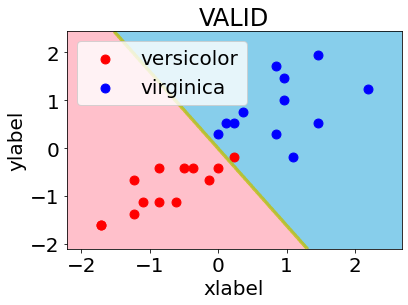

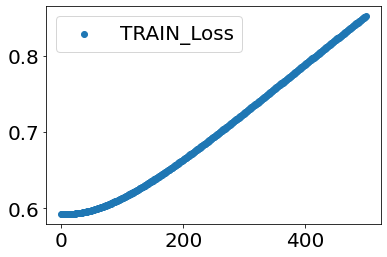

Parameter: 1
KFold 3 / 4
SUCORE :  0.96
theta: [0.57885246 1.21400916 1.27041139]


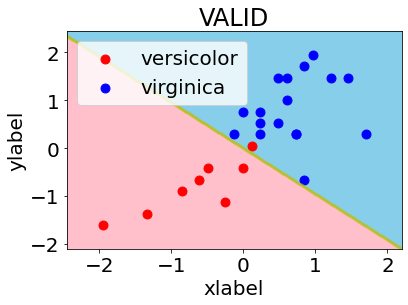

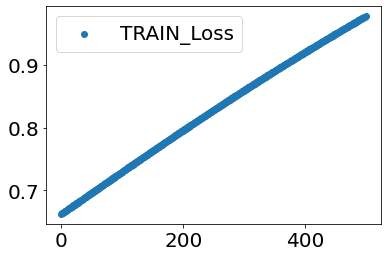

Parameter: 1
KFold 4 / 4
SUCORE :  0.96
theta: [0.09366623 1.18434865 1.27895979]


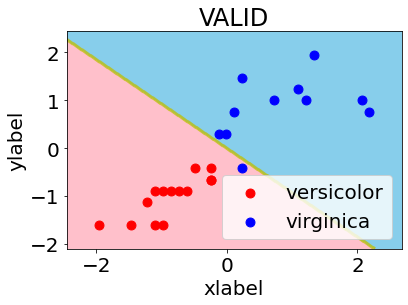

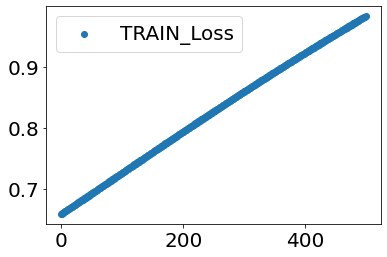

Parameter: 10
KFold 1 / 4
SUCORE :  0.88
theta: [0.03245256 1.24994622 1.17555428]


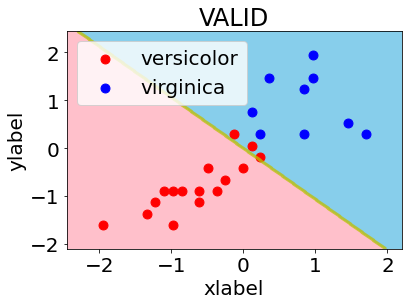

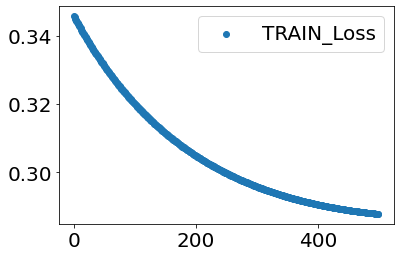

Parameter: 10
KFold 2 / 4
SUCORE :  0.96
theta: [0.98306035 1.31138818 1.0072773 ]


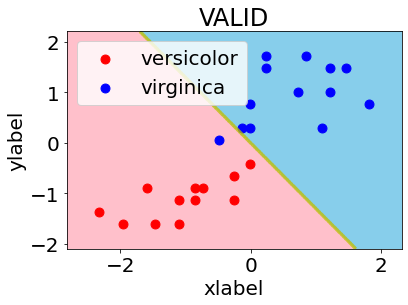

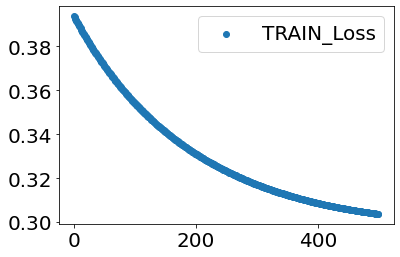

Parameter: 10
KFold 3 / 4
SUCORE :  1.0
theta: [0.09091572 1.38039459 1.16101154]


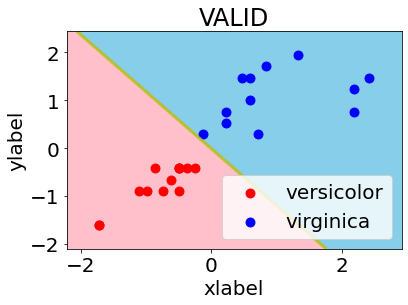

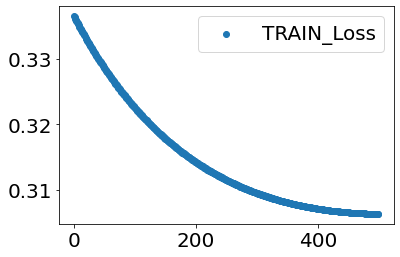

Parameter: 10
KFold 4 / 4
SUCORE :  0.88
theta: [0.59636768 0.77535417 1.34988836]


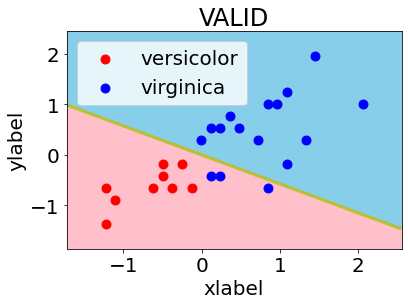

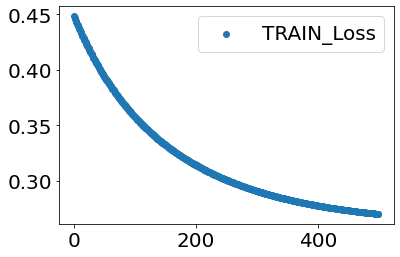

Parameter: 100
KFold 1 / 4
SUCORE :  1.0
theta: [0.70958218 1.01725088 0.90509805]


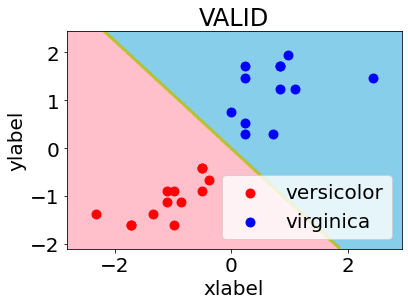

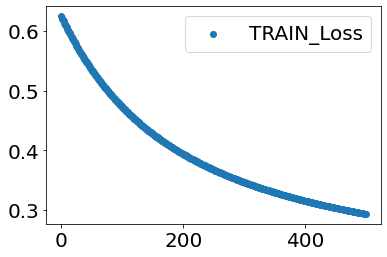

Parameter: 100
KFold 2 / 4
SUCORE :  0.96
theta: [0.04221628 0.9604322  1.02528935]


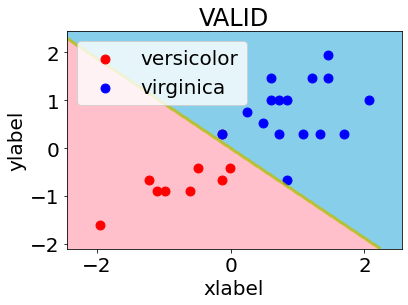

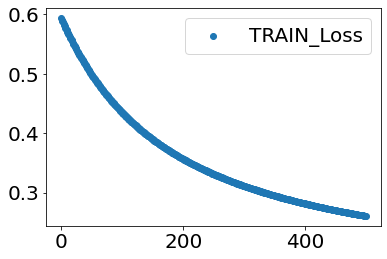

Parameter: 100
KFold 3 / 4
SUCORE :  0.88
theta: [0.03770095 1.15719547 1.38959122]


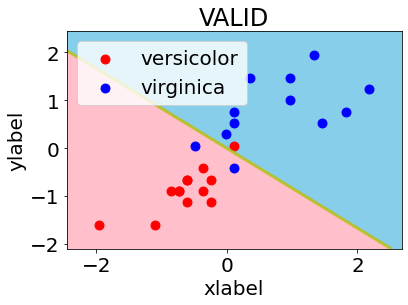

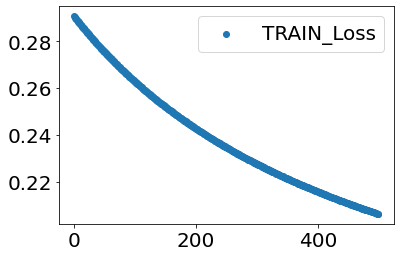

Parameter: 100
KFold 4 / 4
SUCORE :  0.92
theta: [0.88192793 1.33000201 0.97414315]


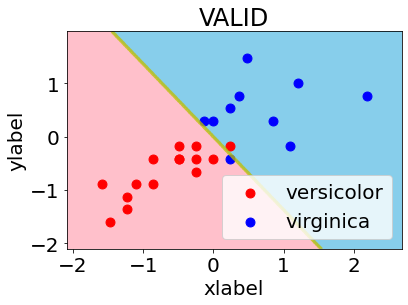

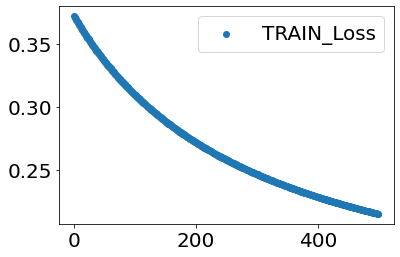

Parameter: 1000
KFold 1 / 4
SUCORE :  1.0
theta: [0.33365691 0.73144632 1.4304367 ]


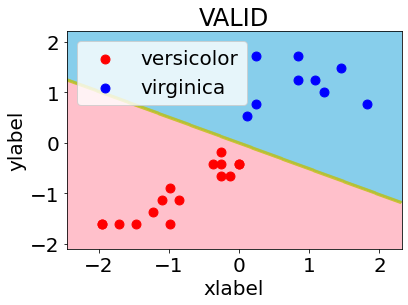

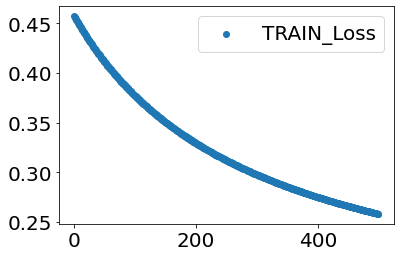

Parameter: 1000
KFold 2 / 4
SUCORE :  0.96
theta: [0.63866433 1.25921968 1.32020098]


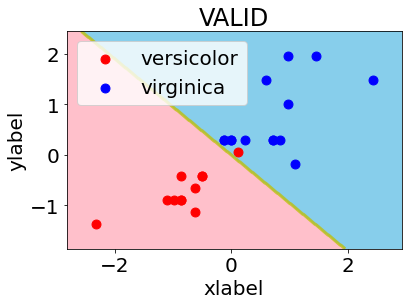

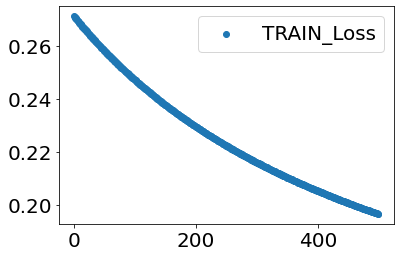

Parameter: 1000
KFold 3 / 4
SUCORE :  0.92
theta: [0.2139024  1.03212027 1.000442  ]


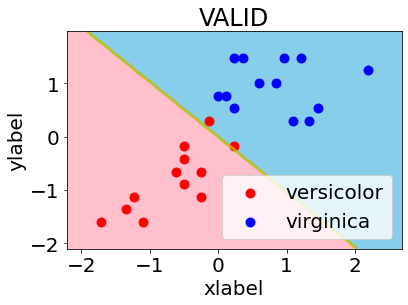

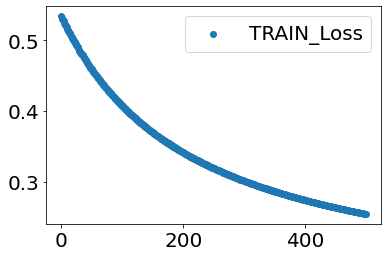

Parameter: 1000
KFold 4 / 4
SUCORE :  0.88
theta: [0.298712   1.07973168 1.02270072]


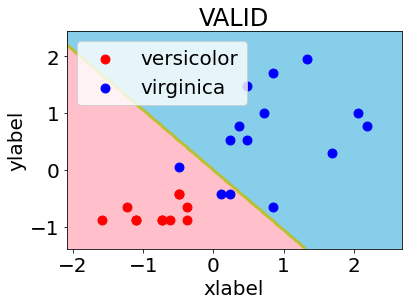

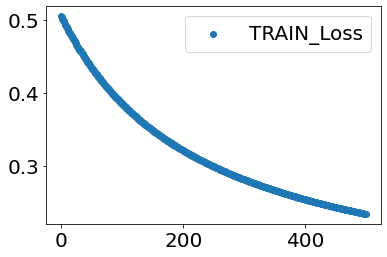

In [44]:
from sklearn.model_selection import KFold

# データ
X = iris_X
y = iris_y

# 標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 交差検証
kf = KFold(n_splits=4,random_state=None, shuffle=True)

# パラメータ
parameters = [0.001,0.01,0.1,1,10,100,1000]

for value in parameters:
    # モデル
    model = ScratchLogisticRegression(num_iter=500, C=value)
    
    count = 0
    for train_index, valid_index in kf.split(X):
        count += 1
        print('Parameter:',value)
        print('KFold',count,'/',kf.get_n_splits())
            
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
            
        y_train = y_train.ravel() 
        y_valid = y_valid.ravel() 
            
        # 訓練データによるモデル作成
        model.fit(X_train, y_train)
        # 検証データに対する予測
        y_pred = model.predict(X_valid)
         
        # 評価
        score = accuracy_score(y_valid, y_pred)
        print('SUCORE : ',score)
        print('theta:',model.theta)
        
        # decision_region(X_train,y_train,model,title='TRAIN')
        decision_region(X_valid,y_valid,model,title='VALID')
        
        # 欠損
        plt.scatter(range(len(model.loss)),model.loss,label='TRAIN_Loss')
        plt.legend()
        plt.show()

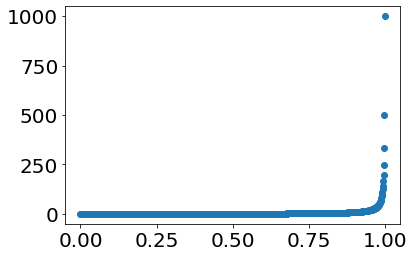

In [45]:
# オッズ比率
p = np.arange(0,1,0.001)
odds_ratio = p/(1-p)
plt.scatter(p,odds_ratio);

In [46]:
theta = [2,2,2]

In [47]:
x1 = np.array([2,1,5,6,4,7]).reshape(-1,2)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

error = np.array([1,0,1])
lamda = np.append(0,np.ones(x.shape[1]-1))*2
lamda

array([0., 2., 2.])

In [48]:
lamda*theta

array([0., 4., 4.])

In [49]:
theta -= 0.1*(np.dot(error,x) + lamda*theta)/len(x)
theta

array([1.93333333, 1.66666667, 1.6       ])

In [50]:
ycheck = np.where(y_train==np.unique(y_train)[0],0,1)
print(np.unique(y_train))
print(np.unique(ycheck))

[1. 2.]
[0 1]


In [51]:
np.random.rand(2)/10

array([0.01844589, 0.01129211])